In [2]:
#import dataset
import pandas as pd
import numpy as np

data = pd.read_csv('/Users/juksychen/Desktop/database.csv', encoding='latin1')
print(data.head())

   Surface Area  Pore Volume  Pressure  Temperature METAL  \
0        1270.0         0.71      0.15        298.0    Cu   
1        1270.0         0.71      1.00        298.0    Cu   
2        1270.0         0.71      1.00        313.0    Cu   
3        2833.0         1.04     35.00        298.0    Zn   
4        1568.0         1.07     35.00        298.0    Zn   

              SMILE_Organic_linker_1  Numéro_atomique  Masse_molaire__g_mol_  \
0  OC(=O)C1=CC(=CC(=C1)C(O)=O)C(O)=O             29.0                  63.55   
1  OC(=O)C1=CC(=CC(=C1)C(O)=O)C(O)=O             29.0                  63.55   
2  OC(=O)C1=CC(=CC(=C1)C(O)=O)C(O)=O             29.0                  63.55   
3         C(=O)(C1=CC=C(C=C1)C(=O)O)             30.0                  65.38   
4       C(=O)(C1=CC(=CC=C1C(=O)O)N)O             30.0                  65.38   

   Point_de_fusion__°C_  Point_d'ébullition__°C_  ...    3d   4s   4p   4d  \
0                1085.0                   2562.0  ...  10.0  1.0  0.0  0.0

In [4]:
#plot the correlation matrix between the different features and the target
#firstly, we need to drop the columns which are not numeric
numeric_data = data.select_dtypes(include=['float64','int64'])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)
print(correlation_matrix['CO2 Uptake'].sort_values(ascending=False)) #in order to see the realtion between the feature to co2 uptake more obviously

                                Surface Area  Pore Volume  Pressure  \
Surface Area                        1.000000     0.700710  0.450541   
Pore Volume                         0.700710     1.000000  0.307430   
Pressure                            0.450541     0.307430  1.000000   
Temperature                         0.120004     0.028469  0.154304   
Numéro_atomique                    -0.071879    -0.034675 -0.052518   
Masse_molaire__g_mol_              -0.067392    -0.035428 -0.052537   
Point_de_fusion__°C_               -0.146702    -0.193744 -0.145570   
Point_d'ébullition__°C_            -0.135326    -0.208531 -0.184556   
Électronegativité__Pauling_         0.102631     0.014189 -0.047989   
Affinité_électronique__eV_          0.093591    -0.064918 -0.129945   
Densité__g_cm³_                     0.056549     0.005917 -0.053467   
Rayon_atomique__pm_                -0.107374    -0.058605 -0.033515   
Conductivité_thermique__W_m·K_      0.331755     0.127516  0.006723   
Conduc

In [6]:
#clean and preprocess the data
#From above, there are three features depending the CO2 uptake, so drop the other feature
selected_columns = ['Pressure','Surface Area','Pore Volume','CO2 Uptake','METAL'] # METAL is the categorical variable
filtered_data = data[selected_columns]
print(filtered_data)

     Pressure  Surface Area  Pore Volume  CO2 Uptake METAL
0        0.15        1270.0         0.71        0.86    Cu
1        1.00        1270.0         0.71        5.27    Cu
2        1.00        1270.0         0.71        2.91    Cu
3       35.00        2833.0         1.04       21.70    Zn
4       35.00        1568.0         1.07       18.70    Zn
..        ...           ...          ...         ...   ...
261       NaN           NaN          NaN         NaN   NaN
262       NaN           NaN          NaN         NaN   NaN
263       NaN           NaN          NaN         NaN   NaN
264       NaN           NaN          NaN         NaN   NaN
265       NaN           NaN          NaN         NaN   NaN

[266 rows x 5 columns]


In [8]:
#handling the missing value
#check the sum of missing value
print(filtered_data.isnull().sum())

Pressure        30
Surface Area    30
Pore Volume     30
CO2 Uptake      30
METAL           30
dtype: int64


In [9]:
#check the position of missing values
print(filtered_data.tail(30))

     Pressure  Surface Area  Pore Volume  CO2 Uptake METAL
236       NaN           NaN          NaN         NaN   NaN
237       NaN           NaN          NaN         NaN   NaN
238       NaN           NaN          NaN         NaN   NaN
239       NaN           NaN          NaN         NaN   NaN
240       NaN           NaN          NaN         NaN   NaN
241       NaN           NaN          NaN         NaN   NaN
242       NaN           NaN          NaN         NaN   NaN
243       NaN           NaN          NaN         NaN   NaN
244       NaN           NaN          NaN         NaN   NaN
245       NaN           NaN          NaN         NaN   NaN
246       NaN           NaN          NaN         NaN   NaN
247       NaN           NaN          NaN         NaN   NaN
248       NaN           NaN          NaN         NaN   NaN
249       NaN           NaN          NaN         NaN   NaN
250       NaN           NaN          NaN         NaN   NaN
251       NaN           NaN          NaN         NaN   N

In [11]:
#from above all 30 missing value is at the tail of dataset, which means they are meaningless, thus drop them
#drop the missing data
cleaned_data = filtered_data.head(len(filtered_data)-30)
print(cleaned_data)
print(cleaned_data.isnull().sum()) #check the missing values after treatment

     Pressure  Surface Area  Pore Volume  CO2 Uptake METAL
0        0.15        1270.0         0.71        0.86    Cu
1        1.00        1270.0         0.71        5.27    Cu
2        1.00        1270.0         0.71        2.91    Cu
3       35.00        2833.0         1.04       21.70    Zn
4       35.00        1568.0         1.07       18.70    Zn
..        ...           ...          ...         ...   ...
231      1.00         147.0         0.10        2.11    Cu
232      1.00        2850.0         1.00        8.75    Cu
233      0.15        2850.0         1.00        1.83    Cu
234      1.00         704.0         0.28        1.16    Zn
235      0.15         704.0         0.28        0.21    Zn

[236 rows x 5 columns]
Pressure        0
Surface Area    0
Pore Volume     0
CO2 Uptake      0
METAL           0
dtype: int64


In [13]:
#handling the categorical variables ('METAL' is defined as catorical variables)
cleaned_data_encoded = pd.get_dummies(cleaned_data,columns=['METAL'],drop_first=True)
print(cleaned_data_encoded)

     Pressure  Surface Area  Pore Volume  CO2 Uptake  METAL_Co  METAL_Cr  \
0        0.15        1270.0         0.71        0.86     False     False   
1        1.00        1270.0         0.71        5.27     False     False   
2        1.00        1270.0         0.71        2.91     False     False   
3       35.00        2833.0         1.04       21.70     False     False   
4       35.00        1568.0         1.07       18.70     False     False   
..        ...           ...          ...         ...       ...       ...   
231      1.00         147.0         0.10        2.11     False     False   
232      1.00        2850.0         1.00        8.75     False     False   
233      0.15        2850.0         1.00        1.83     False     False   
234      1.00         704.0         0.28        1.16     False     False   
235      0.15         704.0         0.28        0.21     False     False   

     METAL_Cu  METAL_Fe  METAL_In  METAL_Mg  METAL_Mg\n  METAL_Mn  METAL_Ni  \
0       

In [17]:
#scaling the data
from sklearn.preprocessing import StandardScaler
numeric_features = ['Pressure','Surface Area','Pore Volume']
scaler = StandardScaler()
data_encoded = cleaned_data_encoded
data_encoded[numeric_features] = scaler.fit_transform(data_encoded[numeric_features])
print(data_encoded)

     Pressure  Surface Area  Pore Volume  CO2 Uptake  METAL_Co  METAL_Cr  \
0   -0.588693     -0.299369    -0.163164        0.86     False     False   
1   -0.518790     -0.299369    -0.163164        5.27     False     False   
2   -0.518790     -0.299369    -0.163164        2.91     False     False   
3    2.277360      0.918240     0.198556       21.70     False     False   
4    2.277360     -0.067221     0.231440       18.70     False     False   
..        ...           ...          ...         ...       ...       ...   
231 -0.518790     -1.174209    -0.831800        2.11     False     False   
232 -0.518790      0.931484     0.154711        8.75     False     False   
233 -0.588693      0.931484     0.154711        1.83     False     False   
234 -0.518790     -0.740294    -0.634497        1.16     False     False   
235 -0.588693     -0.740294    -0.634497        0.21     False     False   

     METAL_Cu  METAL_Fe  METAL_In  METAL_Mg  METAL_Mg\n  METAL_Mn  METAL_Ni  \
0       

In [23]:
#build an initial Baseline model with a simple linear regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#extract features and target variable
x = data_encoded[['Pressure','Surface Area','Pore Volume']]
y = data_encoded['CO2 Uptake']

#split the dataset into training and testing sets using Holdout method
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#initialize the Linear Regression model
model = LinearRegression()

#train the model on th etraining set
model.fit(x_train, y_train)

#make predictions on the test set
y_pred = model.predict(x_test)

#calculate Mean Squared Error (MSE) and R-squared (R^2)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

#print the evaluation results
print(f"Mean Squared Error for simple linear regression:{mse}")
print(f"R-squared for simple linear regression:{r2}")

#print the model coefficients and intercept 
coefficients = model.coef_
intercept = model.intercept_

#print the intercept
print(f"Intercept:{intercept}")

#print each feature's coefficient
for feature_name, coef in zip(['Pressure','Surface Area','Pore Volume'],coefficients):
    print(f"{feature_name}:{coef}")
          

Mean Squared Error for simple linear regression:61.2487702390571
R-squared for simple linear regression:0.6366388799472951
Intercept:6.992327385692319
Pressure:4.420325807223748
Surface Area:4.377166901770896
Pore Volume:0.08180555067665099


In [56]:
#quadratic polynomial regression
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Extract features and target variable
X = data_encoded[['Pressure', 'Surface Area', 'Pore Volume']]
y = data_encoded['CO2 Uptake']

# Generate polynomial features of degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R²) values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print(f"Mean Squared Error for quadratic linear regression: {mse}")
print(f"R-squared for quadratic linear regression: {r2}")

# Get the feature names from the polynomial features
feature_names = poly.get_feature_names_out(['Pressure', 'Surface Area', 'Pore Volume'])

# Extract the model coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the intercept
print(f"Intercept: {intercept}")

# Print each feature's coefficient
for feature_name, coef in zip(feature_names, coefficients):
    print(f"{feature_name}: {coef}")

# Generate the polynomial regression equation
terms = [f"{coef:.4f}*{name}" for coef, name in zip(coefficients, feature_names) if coef != 0]
equation = f"y = {intercept:.4f} + " + " + ".join(terms)

# Print the polynomial regression model equation
print("Polynomial Regression Model:")
print(equation)


Mean Squared Error for quadratic linear regression: 32.46897867793228
R-squared for quadratic linear regression: 0.8073763046452557
Intercept: 8.109999470423173
1: 0.0
Pressure: 7.070817008473009
Surface Area: 0.20279303111833624
Pore Volume: 3.692069490475694
Pressure^2: -1.8644670085101733
Pressure Surface Area: -0.09398171447818932
Pressure Pore Volume: 4.599744525549316
Surface Area^2: 2.010268999037708
Surface Area Pore Volume: -3.175357266450378
Pore Volume^2: -0.18934129768607627
Polynomial Regression Model:
y = 8.1100 + 7.0708*Pressure + 0.2028*Surface Area + 3.6921*Pore Volume + -1.8645*Pressure^2 + -0.0940*Pressure Surface Area + 4.5997*Pressure Pore Volume + 2.0103*Surface Area^2 + -3.1754*Surface Area Pore Volume + -0.1893*Pore Volume^2


In [46]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# load data
X = data_encoded[['Pressure', 'Surface Area', 'Pore Volume']]
y = data_encoded['CO2 Uptake']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler, PolynomialFeatures, and LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Add StandardScaler to normalize the data
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])

# Grid Search for hyperparameter tuning
# Define the parameter grid for Grid Search
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5,6],  # Polynomial degrees to consider
    'linear__fit_intercept': [True, False],  # Whether to calculate the intercept for this model
}

# Create Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')

# Fit Grid Search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score from Grid Search
print("Best parameters from Grid Search:", grid_search.best_params_)
print("Best R-squared from Grid Search:", grid_search.best_score_)

# Use the best model to predict on the test set
y_pred_grid = grid_search.predict(X_test)

# Evaluate the model
mse_grid = mean_squared_error(y_test, y_pred_grid)
r2_grid = r2_score(y_test, y_pred_grid)
print(f"Grid Search - Mean Squared Error: {mse_grid}")
print(f"Grid Search - R-squared: {r2_grid}")

# Randomized Search for hyperparameter tuning
# Define the parameter distribution for Randomized Search
param_dist = {
    'poly__degree': [2, 3, 4],  # Polynomial degrees to consider
    'linear__fit_intercept': [True, False],  # Whether to calculate the intercept for this model
}

# Create Randomized Search with cross-validation
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=6, cv=5, scoring='r2', random_state=42)

# Fit Randomized Search on the training data
random_search.fit(X_train, y_train)

# Print the best parameters and best score from Randomized Search
print("Best parameters from Randomized Search:", random_search.best_params_)
print("Best R-squared from Randomized Search:", random_search.best_score_)

# Use the best model to predict on the test set
y_pred_random = random_search.predict(X_test)

# Evaluate the model
mse_random = mean_squared_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)
print(f"Random Search - Mean Squared Error: {mse_random}")
print(f"Random Search - R-squared: {r2_random}")


Best parameters from Grid Search: {'linear__fit_intercept': False, 'poly__degree': 2}
Best R-squared from Grid Search: 0.7161973391549001
Grid Search - Mean Squared Error: 32.4689786779322
Grid Search - R-squared: 0.8073763046452561
Best parameters from Randomized Search: {'poly__degree': 2, 'linear__fit_intercept': False}
Best R-squared from Randomized Search: 0.7161973391549001
Random Search - Mean Squared Error: 32.4689786779322
Random Search - R-squared: 0.8073763046452561


In [104]:
#try to introduce all hyper parameters
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Extract features and target variable
X = data_encoded[['Pressure', 'Surface Area', 'Pore Volume']]
y = data_encoded['CO2 Uptake']

# Create a Pipeline that includes polynomial features, scaling, and a Ridge regression model
pipe = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),  # Standardization of features
    ('regressor', Ridge())  # Using Ridge regression for regularization
])

# Define the parameter grid for Grid Search
param_grid = {
    'poly__degree': [1, 2, 3, 4],  # Degree of the polynomial
    'poly__interaction_only': [False, True],  # Whether to generate only interaction features
    'poly__include_bias': [True, False],  # Whether to include the bias term
    'regressor__alpha': [0.1, 0.9, 1,1.1, 1.2,1.3, 10, 50,90,100, 150, 200],  # Regularization strength for Ridge regression
    'regressor__fit_intercept': [True, False]  # Whether to calculate the intercept
}

# Perform Grid Search
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Output the best parameters and best score from Grid Search
print("Best parameters found by Grid Search:")
print(grid_search.best_params_)
print("Best MSE from Grid Search:", -grid_search.best_score_)

# Define the parameter distribution for Random Search
param_dist = {
    'poly__degree': [1, 2, 3, 4, 5],
    'poly__interaction_only': [False, True],
    'poly__include_bias': [True, False],
    'regressor__alpha':[0.1, 0.9, 1,1.1, 1.2,1.3, 10, 100],  # Regularization strength for Ridge regression in log space
    'regressor__fit_intercept': [True, False]
}

# Perform Random Search
random_search = RandomizedSearchCV(pipe, param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X, y)

# Output the best parameters and best score from Random Search
print("Best parameters found by Random Search:")
print(random_search.best_params_)
print("Best MSE from Random Search:", -random_search.best_score_)

# Evaluate the models using the best found parameters
best_model_grid = grid_search.best_estimator_
best_model_random = random_search.best_estimator_

# Make predictions with the best models
y_pred_grid = best_model_grid.predict(X)
y_pred_random = best_model_random.predict(X)

# Calculate MSE and R² for both models
mse_grid = mean_squared_error(y, y_pred_grid)
r2_grid = r2_score(y, y_pred_grid)

mse_random = mean_squared_error(y, y_pred_random)
r2_random = r2_score(y, y_pred_random)

print(f"Grid Search: MSE = {mse_grid}, R² = {r2_grid}")
print(f"Random Search: MSE = {mse_random}, R² = {r2_random}")


Best parameters found by Grid Search:
{'poly__degree': 2, 'poly__include_bias': True, 'poly__interaction_only': True, 'regressor__alpha': 50, 'regressor__fit_intercept': True}
Best MSE from Grid Search: 26.450555260814713
Best parameters found by Random Search:
{'regressor__fit_intercept': True, 'regressor__alpha': 10, 'poly__interaction_only': False, 'poly__include_bias': True, 'poly__degree': 2}
Best MSE from Random Search: 36.25871149099658
Grid Search: MSE = 23.17449374326357, R² = 0.7689984089437496
Random Search: MSE = 19.59819454529368, R² = 0.8046466873474312


In [96]:
#adjust hyper parameters
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Extract features and target variable
X = data_encoded[['Pressure', 'Surface Area', 'Pore Volume']]
y = data_encoded['CO2 Uptake']

# Create a Pipeline that includes polynomial features, scaling, and a Ridge regression model
pipe = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),  # Standardization of features
    ('regressor', Ridge())  # Using Ridge regression for regularization
])

# Define the parameter grid for Grid Search
param_grid = {
    'poly__degree': [1, 2, 3, 4],  # Degree of the polynomial
    'poly__include_bias': [True, False],  # Whether to include the bias term
    'regressor__alpha': [0.1, 0.9, 1,1.1, 1.2,1.3,2,3,3.7,3.8,3.9,4,4.1,4.2,5, 10, 50,90,100, 150, 200],  # Regularization strength for Ridge regression
}

# Perform Grid Search
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Output the best parameters and best score from Grid Search
print("Best parameters found by Grid Search:")
print(grid_search.best_params_)
print("Best MSE from Grid Search:", -grid_search.best_score_)

# Define the parameter distribution for Random Search
param_dist = {
    'poly__degree': [1, 2, 3, 4, 5],
    'poly__interaction_only': [False, True],
    'poly__include_bias': [True, False],
    'regressor__alpha':[0.1, 0.9, 1,1.1, 1.2,1.3,10, 100],  # Regularization strength for Ridge regression in log space
    'regressor__fit_intercept': [True, False]
}

# Perform Random Search
random_search = RandomizedSearchCV(pipe, param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X, y)

# Output the best parameters and best score from Random Search
print("Best parameters found by Random Search:")
print(random_search.best_params_)
print("Best MSE from Random Search:", -random_search.best_score_)

# Evaluate the models using the best found parameters
best_model_grid = grid_search.best_estimator_
best_model_random = random_search.best_estimator_

# Make predictions with the best models
y_pred_grid = best_model_grid.predict(X)
y_pred_random = best_model_random.predict(X)

# Calculate MSE and R² for both models
mse_grid = mean_squared_error(y, y_pred_grid)
r2_grid = r2_score(y, y_pred_grid)

mse_random = mean_squared_error(y, y_pred_random)
r2_random = r2_score(y, y_pred_random)

print(f"Grid Search: MSE = {mse_grid}, R² = {r2_grid}")
print(f"Random Search: MSE = {mse_random}, R² = {r2_random}")


/Users/juksychen/Library/Python/3.9/lib/python/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found by Grid Search:
{'poly__degree': 2, 'poly__include_bias': False, 'regressor__alpha': 3.8}
Best MSE from Grid Search: 34.1286048927558
Best parameters found by Random Search:
{'regressor__fit_intercept': True, 'regressor__alpha': 10, 'poly__interaction_only': False, 'poly__include_bias': True, 'poly__degree': 2}
Best MSE from Random Search: 36.25871149099658
Grid Search: MSE = 18.990130577132284, R² = 0.8107078227346968
Random Search: MSE = 19.59819454529368, R² = 0.8046466873474312


Test Set MSE: 35.43548785923256
Test Set R-squared: 0.7897773537674381


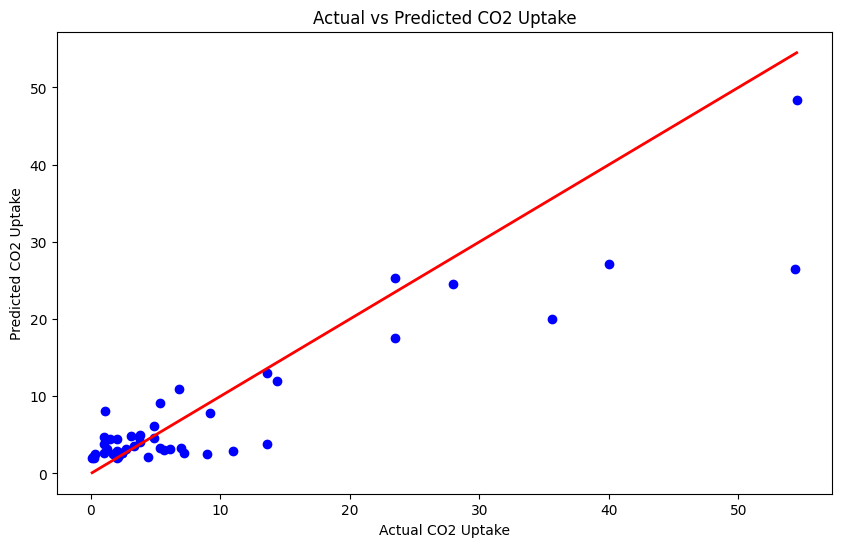

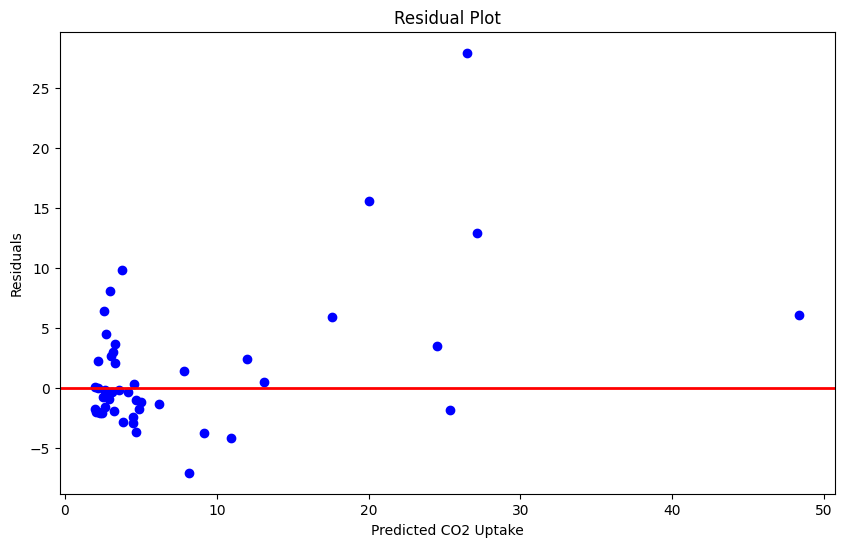

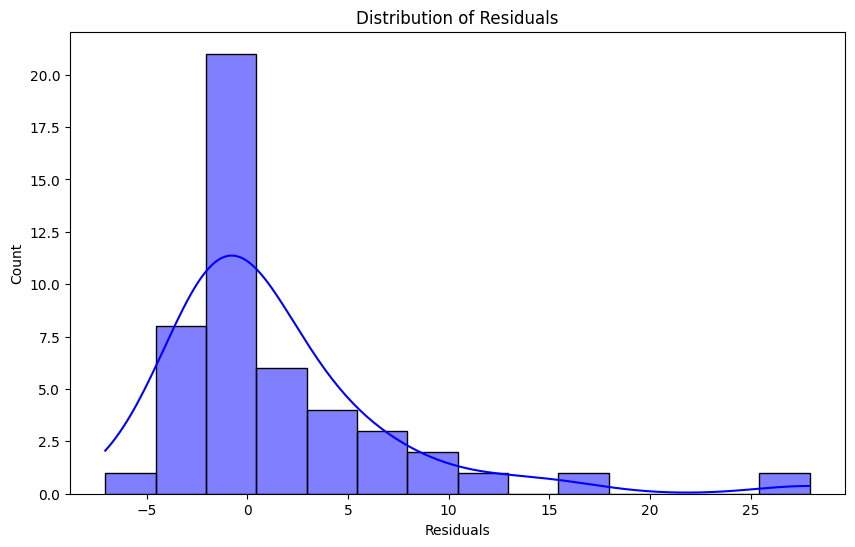

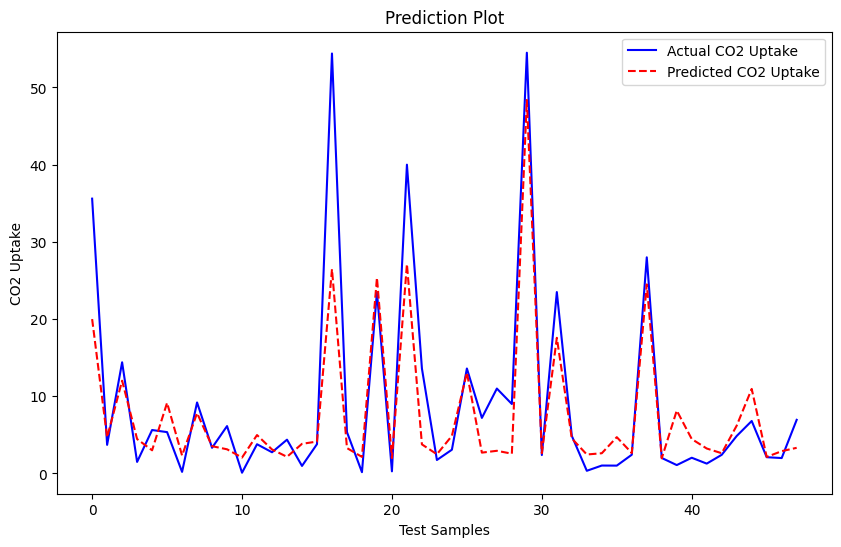

In [92]:
#rebuil the model
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Extract features and target variable
X = data_encoded[['Pressure', 'Surface Area', 'Pore Volume']]
y = data_encoded['CO2 Uptake']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rebuild the model using the optimized hyperparameters
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

# Initialize the Ridge regression model with the optimized alpha
model = Ridge(alpha=3.8, fit_intercept=True)
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Set MSE: {mse}")
print(f"Test Set R-squared: {r2}")

# Visualization

# Scatter plot of predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual CO2 Uptake')
plt.ylabel('Predicted CO2 Uptake')
plt.title('Actual vs Predicted CO2 Uptake')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Predicted CO2 Uptake')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

# Prediction plot (comparing predictions to actual values)
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual CO2 Uptake', color='blue')
plt.plot(y_pred, label='Predicted CO2 Uptake', color='red', linestyle='--')
plt.xlabel('Test Samples')
plt.ylabel('CO2 Uptake')
plt.title('Prediction Plot')
plt.legend()
plt.show()


In [102]:
#Bonus (a)
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Extract features and target variable
X = data_encoded[['Pressure', 'Surface Area', 'Pore Volume']].copy() 
y = data_encoded['CO2 Uptake']

# Feature Engineering: Adding squared and cubic features
X.loc[:, 'Pressure^2'] = X['Pressure'] ** 2
X.loc[:, 'Pressure^3'] = X['Pressure'] ** 3
X.loc[:, 'Surface Area^2'] = X['Surface Area'] ** 2
X.loc[:, 'Surface Area^3'] = X['Surface Area'] ** 3
X.loc[:, 'Pore Volume^2'] = X['Pore Volume'] ** 2
X.loc[:, 'Pore Volume^3'] = X['Pore Volume'] ** 3

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Ridge regression model with the optimized alpha (3.8)
model = Ridge(alpha=3.8, fit_intercept=True)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Set MSE after Feature Engineering: {mse}")
print(f"Test Set R-squared after Feature Engineering: {r2}")




Test Set MSE after Feature Engineering: 61.22720932819283
Test Set R-squared after Feature Engineering: 0.6367667910333531


In [101]:
# Bonus (b)
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Extract features and target variable
X = data_encoded[['Pressure', 'Surface Area', 'Pore Volume']].copy() 
y = data_encoded['CO2 Uptake']

# Feature Engineering: Adding squared and cubic features
X['Pressure^2'] = X['Pressure'] ** 2
X['Pressure^3'] = X['Pressure'] ** 3
X['Surface Area^2'] = X['Surface Area'] ** 2
X['Surface Area^3'] = X['Surface Area'] ** 3
X['Pore Volume^2'] = X['Pore Volume'] ** 2
X['Pore Volume^3'] = X['Pore Volume'] ** 3

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Ridge regression model
model = Ridge(alpha=3.8, fit_intercept=True)

# Perform RFE to select the most relevant features
rfe = RFE(estimator=model, n_features_to_select=5)  # You can adjust n_features_to_select
rfe.fit(X_train_scaled, y_train)

# Get the ranking of features and the selected features
ranking = rfe.ranking_
selected_features = X.columns[rfe.support_]

print("Feature ranking:", ranking)
print("Selected features:", selected_features)

# Rebuild the model using only the selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Set MSE after RFE: {mse}")
print(f"Test Set R-squared after RFE: {r2}")



Feature ranking: [1 2 1 3 4 1 1 1 5]
Selected features: Index(['Pressure', 'Pore Volume', 'Surface Area^2', 'Surface Area^3',
       'Pore Volume^2'],
      dtype='object')
Test Set MSE after RFE: 59.37607614664349
Test Set R-squared after RFE: 0.647748722974014


In [103]:
#Bonus(3)
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Extract features and target variable
X = data_encoded[['Pressure', 'Surface Area', 'Pore Volume']].copy() 
y = data_encoded['CO2 Uptake']

# Feature Engineering: Adding squared and cubic features
X['Pressure^2'] = X['Pressure'] ** 2
X['Pressure^3'] = X['Pressure'] ** 3
X['Surface Area^2'] = X['Surface Area'] ** 2
X['Surface Area^3'] = X['Surface Area'] ** 3
X['Pore Volume^2'] = X['Pore Volume'] ** 2
X['Pore Volume^3'] = X['Pore Volume'] ** 3

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
ridge_model = Ridge(alpha=3.8, fit_intercept=True)
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1) 
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) 

# Train and evaluate Ridge (Polynomial Linear Regression)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression (Polynomial) - MSE: {mse_ridge}, R²: {r2_ridge}")

# Train and evaluate Support Vector Regression (SVR)
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"Support Vector Regression - MSE: {mse_svr}, R²: {r2_svr}")

# Train and evaluate Random Forest Regression
rf_model.fit(X_train, y_train)  # No need to scale for Random Forest
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regression - MSE: {mse_rf}, R²: {r2_rf}")



Ridge Regression (Polynomial) - MSE: 61.22720932819283, R²: 0.6367667910333531
Support Vector Regression - MSE: 124.68797978048421, R²: 0.26028287893273383
Random Forest Regression - MSE: 45.36467338433162, R²: 0.730872008247367
